In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.misc import imread
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image
import os
from subprocess import check_output
#print(check_output(["ls", "../input/train/"]).decode("utf8"))
from skimage import measure

//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
img = Image.open('../data/raw/train/ALB/test.jpg')

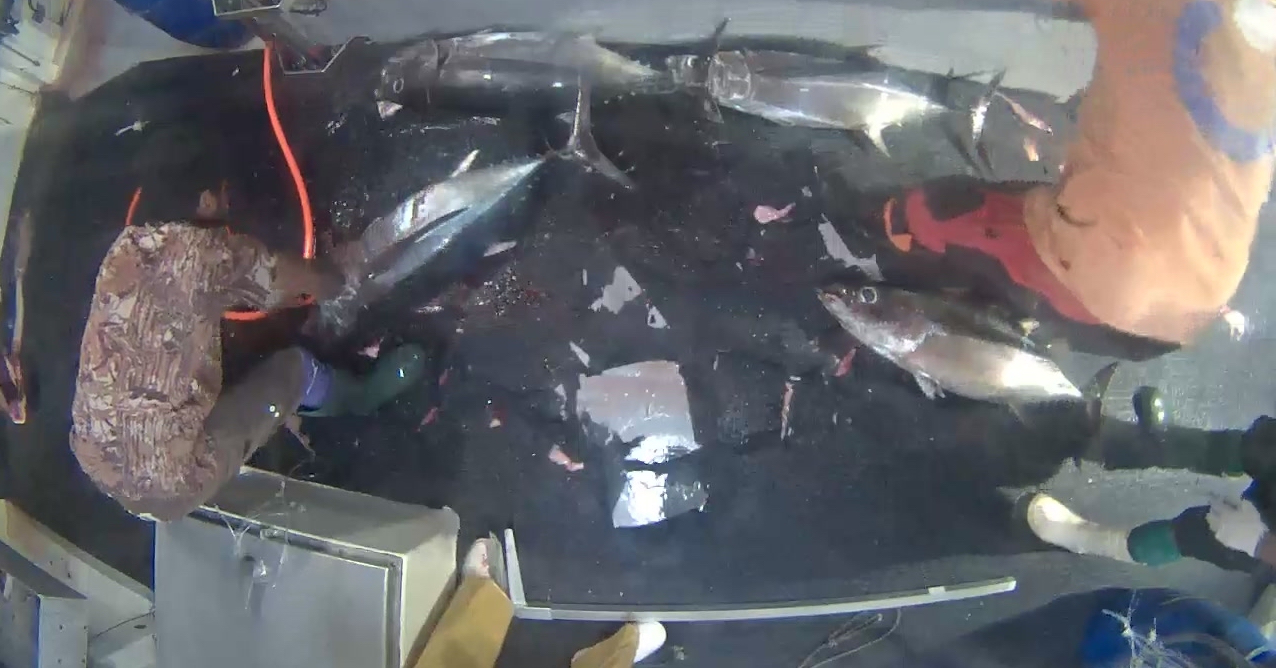

In [3]:
img

In [4]:
albs = os.listdir('../data/raw/train/ALB/')

In [5]:
len(albs)

1720

In [6]:
img.getpixel((1,1))

(91, 102, 94)

In [7]:
img_gray = img.convert('L')

In [8]:
contours = measure.find_contours(img_gray, 100)

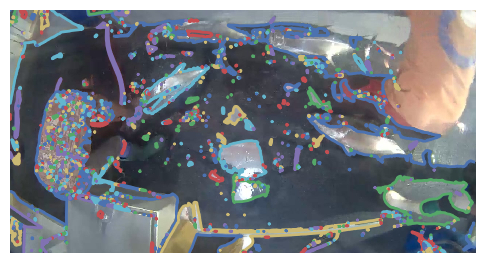

In [9]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [10]:
con_array = np.asarray(contours)
con_array[5]
len(con_array[1])
contours[5]

array([[  0.00000000e+00,   1.12866667e+02],
       [  2.50000000e-01,   1.13000000e+02],
       [  7.50000000e-01,   1.14000000e+02],
       ..., 
       [  2.55000000e+02,   6.85185185e-01],
       [  2.56000000e+02,   6.41509434e-01],
       [  2.56918919e+02,   0.00000000e+00]])

In [11]:
#so contours is a list of arrays, each of which contains the indices for each "dot" along the contour, so only the 
#longest ones are useful, but which ones are the longest?
#for x in range (0, len(contours)):
#    print len(contours[x])

In [12]:
contours_long = list()
for x in range (0, len(contours)):
    if len(contours[x]) > 99:
        contours_long.append(contours[x])
        
len(contours_long)

50

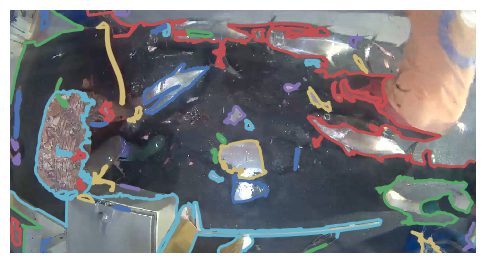

In [13]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours_long):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [14]:
#contours can be features themselves, or you can use them to identify regions of interest